In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 读取CNN分类后的数据进行绘图

In [44]:
# 读取CNN分类后的数据
neg = pd.read_excel('neg.xlsx')
pos = pd.read_excel('pos.xlsx')

In [45]:
posneg = pd.concat((pos,neg))
posneg['label'] = 0
posneg.loc[posneg['Lab Status']=='Positive ID','label'] = 1

Text(0, 0.5, 'Longitude')

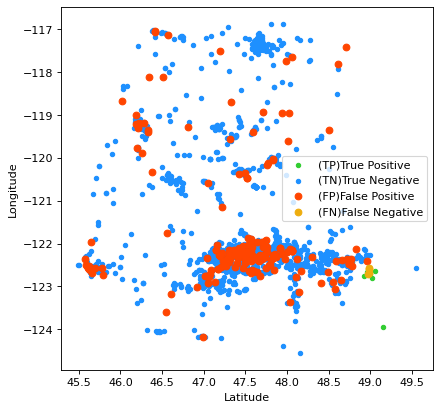

In [46]:
fig = plt.figure(figsize=(6,6),dpi=80)
plt.scatter(pos.loc[(pos['class']==1),'Latitude'],
            pos.loc[(pos['class']==1),'Longitude'],label='(TP)True Positive',c='#32CD32',s=15)
plt.scatter(neg.loc[(neg['class']==0),'Latitude'],
            neg.loc[(neg['class']==0),'Longitude'],label='(TN)True Negative',c='#1E90FF',s=15)
plt.scatter(neg.loc[(neg['class']==1),'Latitude'],
            neg.loc[(neg['class']==1),'Longitude'],label='(FP)False Positive',c='#FF4500')
plt.scatter(pos.loc[(pos['class']==0),'Latitude'],
            pos.loc[(pos['class']==0),'Longitude'],label='(FN)False Negative',c='#EEAD0E')
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(0, 0.5, 'Longitude')

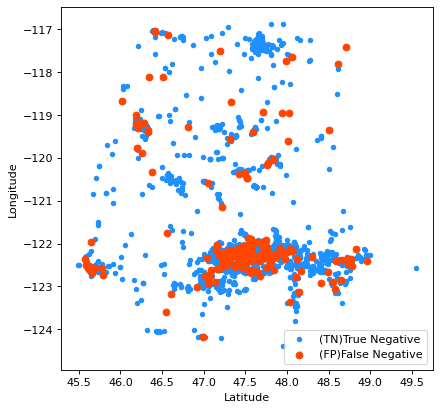

In [47]:
fig = plt.figure(figsize=(6,6),dpi=80)
plt.scatter(neg.loc[(neg['class']==0),'Latitude'],
            neg.loc[(neg['class']==0),'Longitude'],label='(TN)True Negative',c='#1E90FF',s=15)
plt.scatter(neg.loc[(neg['class']==1),'Latitude'],
            neg.loc[(neg['class']==1),'Longitude'],label='(FP)False Negative',c='#FF4500')
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [33]:
pos['label'] = 1
neg['label'] = 0
posneg = pd.concat((pos,neg))
posneg['img'] = (posneg['img'] - min(posneg['img']))/(max(posneg['img'])-min(posneg['img']))

Text(0.5, 1.0, '(b)')

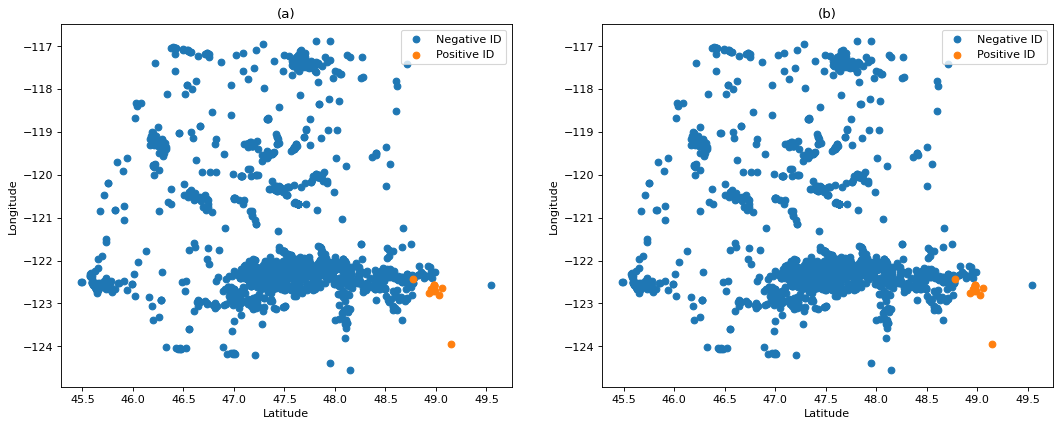

In [34]:
fig = plt.figure(figsize=(16,6),dpi=80)
fig.add_subplot(1,2,1)
plt.scatter(neg['Latitude'],neg['Longitude'],label='Negative ID')
plt.scatter(pos['Latitude'],pos['Longitude'],label='Positive ID')
plt.legend(loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('(a)')
fig.add_subplot(1,2,2)
plt.scatter(neg['Latitude'],neg['Longitude'],label='Negative ID')
plt.scatter(pos['Latitude'],pos['Longitude'],label='Positive ID')
plt.legend(loc='upper right')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('(b)')

## 创建训练集，训练逻辑回归分类器

In [35]:
pos_train = pos[['Latitude','Longitude','Lab Status']]
pos_train['label'] = 1
neg_train = neg[['Latitude','Longitude','Lab Status']]
neg_train['label'] = 0
data_train = pd.concat([pos_train,neg_train])

C:\Users\XAVIER~1\AppData\Local\Temp/ipykernel_5108/3067330973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_train['label'] = 1
C:\Users\XAVIER~1\AppData\Local\Temp/ipykernel_5108/3067330973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_train['label'] = 0


In [36]:
data_train['Latitude'] = (data_train['Latitude'] - min(data_train['Latitude']))/(max(data_train['Latitude'])-min(data_train['Latitude']))
data_train['Longitude'] = (data_train['Longitude'] - min(data_train['Longitude']))/(max(data_train['Longitude'])-min(data_train['Longitude']))
data_train['LatLon'] = data_train['Latitude']*data_train['Longitude']
data_train['Lat2'] = data_train['Latitude']**2
data_train['Lon2'] = data_train['Longitude']**2
data_train['Lat3'] = data_train['Latitude']**3
data_train['Lon3'] = data_train['Longitude']**3

In [37]:
data_train['intercept'] = 1.0
train_cols = ['Latitude','Longitude','LatLon','intercept']

In [38]:
logit = sm.Logit(data_train['label'], data_train[train_cols])
# 拟合模型
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.010668
         Iterations 15


In [39]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 1985
Model:                          Logit   Df Residuals:                     1981
Method:                           MLE   Df Model:                            3
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.7458
Time:                        10:53:19   Log-Likelihood:                -21.176
converged:                       True   LL-Null:                       -83.311
Covariance Type:            nonrobust   LLR p-value:                 9.285e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Latitude      97.3164     22.178      4.388      0.000      53.849     140.784
Longitude     75.7076     25.234      3.000      0.003      26.249     125.166
LatLon      -142.4303     41.905     -3.399      0.0

In [40]:
posneg = pd.read_csv('posneg.csv')

In [41]:
posneg['Latitude'] = (posneg['Latitude'] - min(posneg['Latitude']))/(max(posneg['Latitude'])-min(posneg['Latitude']))
posneg['Longitude'] = (posneg['Longitude'] - min(posneg['Longitude']))/(max(posneg['Longitude'])-min(posneg['Longitude']))
posneg['LatLon'] = posneg['Latitude']*posneg['Longitude']
posneg['intercept'] = 1.0
posneg['predict'] = result.predict(posneg[train_cols])
posneg['imgtrans'] = (posneg['img'] - min(posneg['img']))/(max(posneg['img'])-min(posneg['img']))

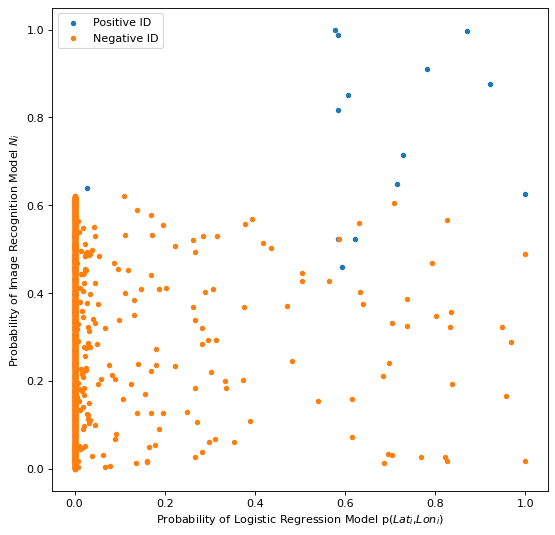

In [42]:
fig = plt.figure(figsize=(8,8),dpi=80)
plt.scatter(posneg.loc[posneg['label']==1,'predict'],posneg.loc[posneg['label']==1,'imgtrans'],s=15,label='Positive ID')
plt.scatter(posneg.loc[posneg['label']==0,'predict'],posneg.loc[posneg['label']==0,'imgtrans'],s=15,label='Negative ID')
plt.xlabel('Probability of Logistic Regression Model p($Lat_i$,$Lon_i$)')
plt.ylabel('Probability of Image Recognition Model $N_i$')
plt.legend()

In [43]:
posneg.to_csv('posneg.csv',index=False)

In [12]:
data_train['predict'] = result.predict(data_train[train_cols])

In [20]:
# 预测完成后，predict 的值是介于 [0, 1] 间的概率值
# 我们可以根据需要，提取预测结果
# 例如，假定 predict > 0.5，则表示会被录取
# 在这边我们检验一下上述选取结果的精确度
r_pos = 0
r_neg = 0
for value in data_train.values:
    # 预测分数 predict, 是数据中的最后一列
    predict = value[-1]
    # 实际录取结果
    label = value[3]
 
    # 假定预测概率大于0.5则表示预测被录取
    if (predict > 0.4) and (label == 1):
        r_pos += 1
    # 表示预测命中
    if (predict <= 0.4) and (label == 0):
        r_neg += 1

In [17]:
print('Total: %d, Hit: %d, Precision: %.2f' % (total, hit, 100.0*hit/total))

Total: 14, Hit: 14, Precision: 100.00


In [19]:
value

array([0.4419972335233909, 0.2846962595541036, 'Negative ID', 0,
       0.12583495911737103, 0.19536155444233091, 0.08105196020409752,
       0.08634926660033958, 0.023075189899634627, 1.0,
       1.8873913485008346e-11], dtype=object)

Text(0, 0.5, 'Longitude (After Standardization)')

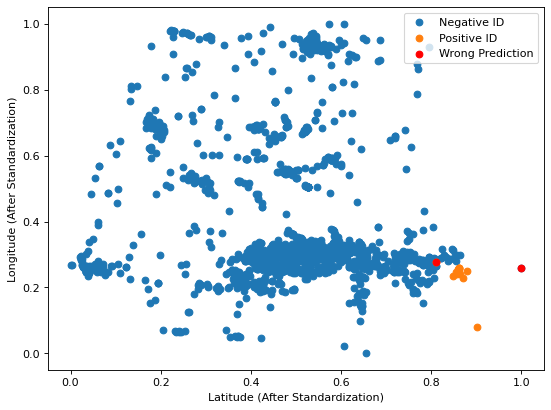

In [36]:
fig = plt.figure(figsize=(8,6),dpi=80)
plt.scatter(neg_train['Latitude'],neg_train['Longitude'],label='Negative ID')
plt.scatter(pos_train['Latitude'],pos_train['Longitude'],label='Positive ID')
plt.scatter(error['Latitude'],error['Longitude'],label='Wrong Prediction',c='r')
plt.legend(loc='upper right')
plt.xlabel('Latitude (After Standardization)')
plt.ylabel('Longitude (After Standardization)')

In [27]:
error = data_train[((data_train['label']==1) & (data_train['predict']<=0.4)) | ((data_train['label']==0) & (data_train['predict']>0.4))]

In [28]:
error

,Latitude,Longitude,Lab Status,label,LatLon,Lat2,Lon2,Lat3,Lon3,intercept,predict
1011,0.810197,0.278491,Positive ID,1,0.225633,0.656419,0.077557,0.531829,0.021599,1.0,0.028049
2304,1.000000,0.257609,Negative ID,0,0.257609,1.000000,0.066362,1.000000,0.017095,1.0,0.999848


In [32]:
neg_train = data_train[data_train['label']==0]
pos_train = data_train[data_train['label']==1]

In [ ]:
result

In [10]:
WS = pd.read_csv('WS.csv')

In [12]:
WS['Latitude'] = (WS['Latitude']-min(WS['Latitude']))/(max(WS['Latitude'])-min(WS['Latitude']))
WS['Longitude'] = (WS['Longitude']-min(WS['Longitude']))/(max(WS['Longitude'])-min(WS['Longitude']))
WS['LatLon'] = WS['Latitude']*WS['Longitude']
WS['intercept'] = 1.0

In [13]:
WS['predict'] = result.predict(WS[train_cols])

In [76]:
WS['img'] = 0.44 + (0.01*(np.random.randn(len(WS))) - 0.011)

In [77]:
WS[WS['img']>=0.44]

,GlobalID,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude,LatLon,intercept,predict,img
4,{0AF6F3AA-8565-4B8F-8BF5-8D43D9677FE2},2019-07-17 00:00:00,,Unverified,Thank you for your submission. Since there is ...,2020-03-19,0.526383,0.743157,0.391185,1.0,3.180971e-09,0.455312
22,{266F962C-6461-4A6D-8660-6AE608F41AB1},2019-12-22 00:00:00,2 of these things were landing in front of my ...,Unverified,,2020-04-07,0.603055,0.319210,0.192501,1.0,1.241205e-07,0.442010
27,{9E46DAE2-B75E-4708-94F8-54FFB3D867C3},2018-06-22 00:00:00,I've seen two in Ephrata between 2017-2018,Unverified,,2020-04-07,0.481403,0.665110,0.320186,1.0,2.674040e-09,0.450412
33,{044EEB7B-71E6-42B4-91BB-32CEC22E9F5B},2019-07-28 00:00:00,The following is a copy of an email that I sen...,Unverified,,2020-04-08,0.591869,0.323656,0.191562,1.0,6.688870e-08,0.443438
39,{0752FE56-5D25-489F-AC37-86E6FB0196AA},2019-07-08 00:00:00,Was driving by soap lake and got hit in the he...,Unverified,,2020-04-08,0.537784,0.673534,0.362216,1.0,3.070436e-09,0.446974
...,...,...,...,...,...,...,...,...,...,...,...,...
2320,{1165248B-DD91-4799-B6B7-E271D519A9B5},2020-04-01 00:00:00,it landed on a window screen while window was ...,Unverified,,2020-10-17,0.345309,0.488462,0.168671,1.0,1.735702e-11,0.440043
2338,{4E587C5B-ADE5-4C46-879D-E3C8701DC462},2020-10-20 00:00:00,Found a pile of wasps with their heads missing...,Unverified,Thanks for the submission. Passing your inform...,2020-10-20,0.873264,0.283436,0.247514,1.0,4.625271e-01,0.446392
2344,{C248B633-A567-4C44-BC3B-FC4D7C74EFD1},2020-09-03 00:00:00,When cutting firewood saw a very unusual horne...,Unprocessed,,2020-10-23,0.759677,0.564064,0.428506,1.0,1.463688e-07,0.452659
2350,{665C417D-A34B-4B58-973A-569EB01C4769},2015-08-20 00:00:00,We were camping up at Sunset Falls Campground ...,Unprocessed,,2020-10-23,0.610860,0.405772,0.247870,1.0,6.996640e-08,0.453117


In [35]:
WS.to_csv('WS.csv',index=False)

In [36]:
max(WS['img'])

0.4466370190475127

In [37]:
min(WS['img'])

0.42721809914763464